In [28]:
from astropy.io import ascii
from astropy.table import Table, Column, MaskedColumn
import sys
import os
import math
# import matplotlib as plt
import os.path
import matplotlib.pyplot as plt
import operator
import numpy as np
from astropy.stats import sigma_clip
from scipy.optimize import curve_fit

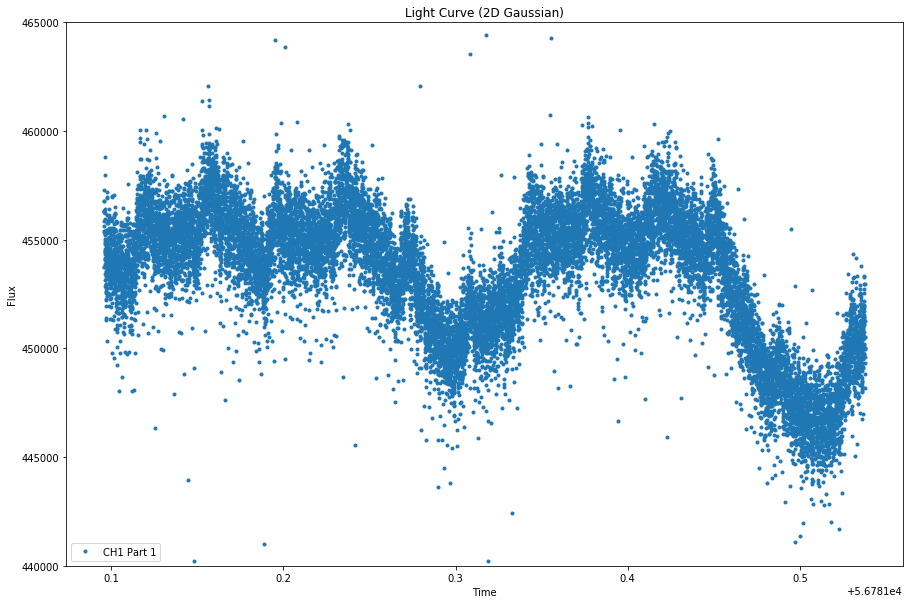

In [36]:
lightcurve_1='/Users/melaniapena/Rsrch/Luhman_16_Research/ap_phot_ascii_2dg/dg_ap_ph_prt1/bcdfits_part_1.txt'
lightcurve_2='/Users/melaniapena/Rsrch/Luhman_16_Research/ap_phot_ascii_2dg/dg_ap_ph_prt2/bcdfits_part_2.txt'
lightcurve_3='/Users/melaniapena/Rsrch/Luhman_16_Research/ap_phot_ascii_2dg/dg_ap_ph_prt3/bcdfits_part_3.txt'
# # lightcurve_4='/Users/melaniapena/Rsrch/Luhman_16_Research/ap_phot_ascii/ap_ph_prt_4/bcdfits_part_4.txt'
lightcurve_4='/Users/melaniapena/Rsrch/Luhman_16_Research/ap_phot_ascii_2dg/dg_ap_ph_prt4/bcdfits_part_4.txt'
lightcurve_5='/Users/melaniapena/Rsrch/Luhman_16_Research/ap_phot_ascii_2dg/dg_ap_ph_prt5/bcdfits_part_5.txt'
# # lightcurve_5='/Users/melaniapena/Rsrch/Luhman_16_Research/ap_phot_ascii/ap_ph_prt_5/bcdfits_part_5.txt'
lightcurve_6_1='/Users/melaniapena/Rsrch/Luhman_16_Research/ap_phot_ascii_2dg/dg_ap_ph_prt6-1/bcdfits_part_6-1.txt'
lightcurve_6_2='/Users/melaniapena/Rsrch/Luhman_16_Research/ap_phot_ascii_2dg/dg_ap_ph_prt6-2/bcdfits_part_6-2.txt'
lightcurve_7='/Users/melaniapena/Rsrch/Luhman_16_Research/ap_phot_ascii_2dg/dg_ap_ph_prt7/bcdfits_part_7.txt'

col_1='AperturePhot'
col_2='bmjd'


data_1 = ascii.read(lightcurve_1)
data_2 = ascii.read(lightcurve_2)
data_3 = ascii.read(lightcurve_3)
data_4 = ascii.read(lightcurve_4)
data_5 = ascii.read(lightcurve_5)
data_6_1 = ascii.read(lightcurve_6_1)
data_6_2 = ascii.read(lightcurve_6_2)
data_7 = ascii.read(lightcurve_7)

ap_ph_1 = data_1[col_1]
bmjd_1 = data_1[col_2]
# col_3 = data_1['']

ap_ph_2 = data_2[col_1]
bmjd_2 = data_2[col_2]

ap_ph_3 = data_3[col_1]
bmjd_3 = data_3[col_2]

ap_ph_4 = data_4['AperturePhot']
bmjd_4 = data_4[col_2]

ap_ph_5 = data_5['AperturePhot']
bmjd_5 = data_5[col_2]

ap_ph_6_1 = data_6_1[col_1]
bmjd_6_1 = data_6_1[col_2]

ap_ph_6_2 = data_6_2[col_1]
bmjd_6_2 = data_6_2[col_2]

ap_ph_7 = data_7[col_1]
bmjd_7 = data_7[col_2]

def median_flux(ap_ph):
    ap_ph_med = ap_ph/np.nanmedian(ap_ph)
    return ap_ph_med
# ap_ph_1=median_flux(ap_ph_1)
# ap_ph_2=median_flux(ap_ph_2)
# ap_ph_3=median_flux(ap_ph_3)
# ap_ph_4=median_flux(ap_ph_4)
# ap_ph_5=median_flux(ap_ph_5)
# ap_ph_6_1=median_flux(ap_ph_6_1)
# ap_ph_6_2=median_flux(ap_ph_6_2)
# ap_ph_7=median_flux(ap_ph_7)


plt.figure(figsize=(15,10))
# plt.ylim([0.950,1.05])
plt.ylim([440000,465000])
plt.ylabel('Flux')
plt.xlabel('Time')
plt.title('Light Curve (2D Gaussian)')
plt.plot(bmjd_1,ap_ph_1,'.',label='CH1 Part 1')
# plt.plot(bmjd_2,ap_ph_2,'.',label='CH2 Part 2')
# plt.plot(bmjd_3,ap_ph_3,'.',label='CH1 Part 3')
# plt.plot(bmjd_4,ap_ph_4,'.',label='CH2 Part 4')
# plt.plot(bmjd_5,ap_ph_5,'.',label='CH2 Part 5')
# plt.plot(bmjd_6_1,ap_ph_6_1,'.',label='CH1 Part 6-1')
# plt.plot(bmjd_6_2,ap_ph_6_2,'.',label='CH1 Part 6-2')
# plt.plot(bmjd_7,ap_ph_7,'.',label='CH1 Part 7')
plt.legend(loc='upper right')

# -----------------------------------------------------------
# def plot_ascii(dir_lightcurv,col_1,col_2,part_str):
#     data = ascii.read(dir_lightcurv)
#     ap_phot = data[col_1]
#     bmjd = data[col_2]
#     plt.plot(bmjd,ap_phot,'.',label=part_str)
# plot_ascii(lightcurve_1,col_1,col_2,'Part 1')
# plot_ascii(lightcurve_2,col_1,col_2,'Part 2')
# plot_ascii(lightcurve_3,col_1,col_2,'Part 3')
# plot_ascii(lightcurve_4,col_1,col_2,'Part 4')
# plot_ascii(lightcurve_5,col_1,col_2,'Part 5')
# plot_ascii(lightcurve_6_1,col_1,col_2,'Part 6-1')
# plot_ascii(lightcurve_6_2,col_1,col_2,'Part 6-2')
# plot_ascii(lightcurve_7,col_1,col_2,'Part 7')
plt.legend(loc='lower left')

# plt.savefig('F-vs-T(prt1-and-prt3)_full.png')

In [26]:
def clip_of_mask_flux(clip_flux):
    clip = sigma_clip( clip_flux, sigma=sigma_num, sigma_lower=None, sigma_upper=None, iters=5, cenfunc=np.ma.median, stdfunc=np.std, axis=None, copy=True)
    clipped = clip[np.logical_not(clip.mask)] - 1.
    return clipped
def clip_of_mask (clp_med_flux, x):
    clip = sigma_clip(clp_med_flux, sigma=sigma_num, sigma_lower=None, sigma_upper=None, iters=5, cenfunc=np.ma.median, stdfunc=np.std, axis=None, copy=True)
    clipped_x = x[np.logical_not(clip.mask)]
    return clipped_x

def clip_arr(data,time,sigma_num,label_nme,colorpnts):
    clip_flux = clip_of_mask_flux(data)
    clip_time = clip_of_mask(data,time)
    plt.plot(clip_time,clip_flux,'.',label=label_nme,color=colorpnts,)
    return clip_flux,clip_time
    

Part 1 (Blue): 18865 18880


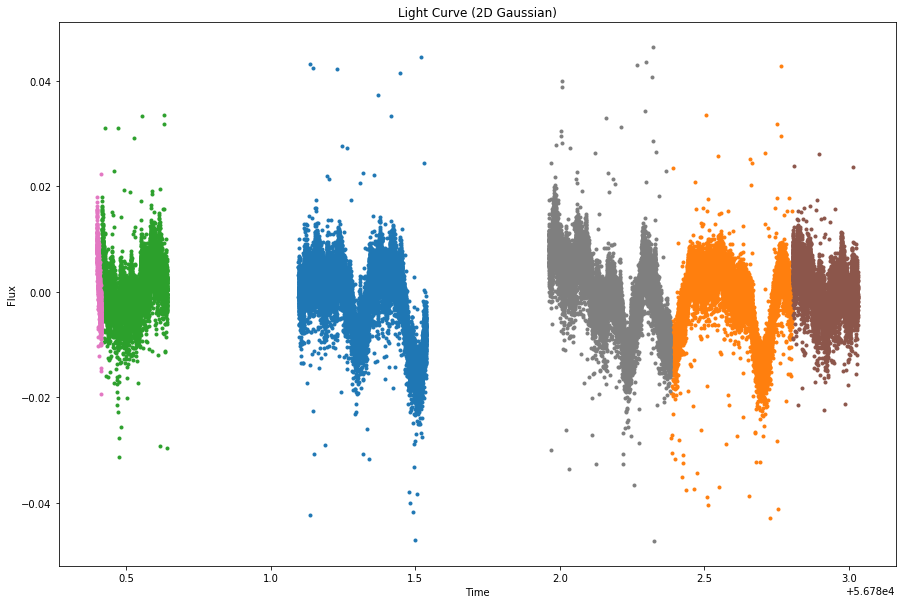

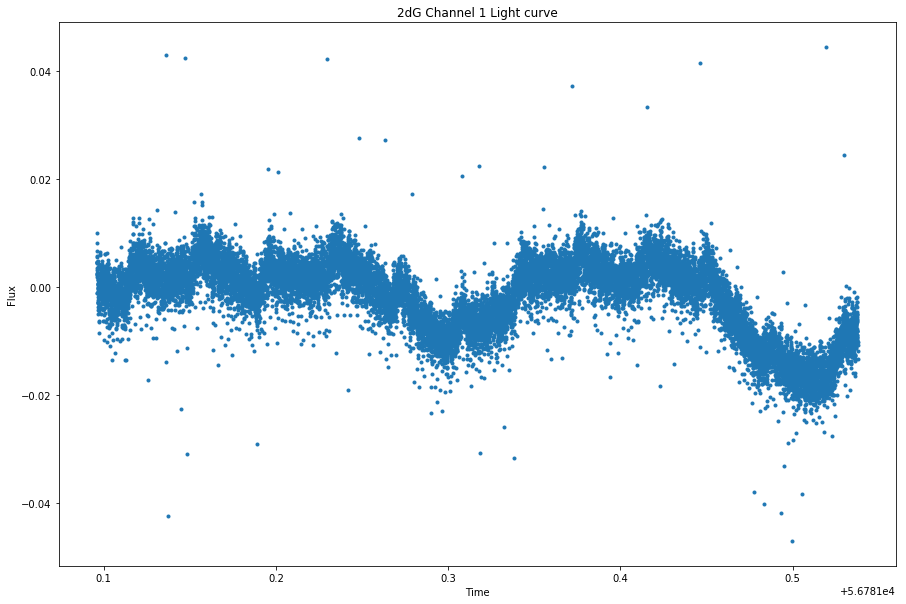

In [27]:
sigma_num=7

# c_f:clipped flux of original aperture photometry array
# c_h:clipped time of the flux

plt.figure(figsize=(15,10))
# both channel 1 and channel 2
plt.ylabel('Flux')
plt.xlabel('Time')
plt.title('Light Curve (2D Gaussian)')
c_f1,c_h1 = clip_arr(ap_ph_1,bmjd_1,sigma_num,'Part 1','tab:blue')
c_f2,c_h2 = clip_arr(ap_ph_2,bmjd_2,sigma_num,'Part 2','tab:orange')
c_f3,c_h3 = clip_arr(ap_ph_3,bmjd_3,sigma_num,'Part 3','tab:green')
## c_f4,c_h4 = clip_arr(ap_ph_4,bmjd_4,sigma_num,'Part 4','tab:red')
## c_f5,c_h5 = clip_arr(ap_ph_5,bmjd_5,sigma_num,'Part 5','tab:purple')
c_f6_1,c_h6_1 = clip_arr(ap_ph_6_1,bmjd_6_1,sigma_num,'Part 6-1','tab:brown')
c_f6_2,c_h6_2 = clip_arr(ap_ph_6_2,bmjd_6_2,sigma_num,'Part 6-2','tab:pink')
c_f7,c_h7 = clip_arr(ap_ph_7,bmjd_7,sigma_num,'Part 7','tab:grey')
# plt.legend(loc='upper right')

print('Part 1 (Blue):',len(c_f1),len(ap_ph_1))
# print('Part 2 (Orange):',len(c_f2),len(ap_ph_2))
# print('Part 3 (Green):',len(c_f3),len(ap_ph_3))
# ## print('Part 4 (Red):',len(c_f4),len(ap_ph_4))
# ## print('Part 5 (Purple):',len(c_f5),len(ap_ph_5))
# print('Part 6_1 (Brown):',len(c_f6_1),len(ap_ph_6_1))
# print('Part 6_2 (Pink):',len(c_f6_2),len(ap_ph_6_2))
# print('Part 7 (Grey):',len(c_f7),len(ap_ph_7))

plt.show()
plt.figure(figsize=(15,10))
plt.ylabel('Flux')
plt.xlabel('Time')
plt.title('2dG Channel 1 Light curve')
c_f1,c_h1 = clip_arr(ap_ph_1,bmjd_1,sigma_num,'Part 1','tab:blue')
# c_f3,c_h3 = clip_arr(ap_ph_3,bmjd_3,sigma_num,'Part 3','tab:green')
# c_f6_1,c_h6_1 = clip_arr(ap_ph_6_1,bmjd_6_1,sigma_num,'Part 6-1','tab:brown')
# c_f6_2,c_h6_2 = clip_arr(ap_ph_6_2,bmjd_6_2,sigma_num,'Part 6-2','tab:pink')
# c_f7,c_h7 = clip_arr(ap_ph_7,bmjd_7,sigma_num,'Part 7','tab:grey')
# plt.legend(loc='upper right')

# plt.show()
# plt.figure(figsize=(15,10))
# plt.ylabel('Flux')
# plt.xlabel('Time')
# plt.title('2dG Channel 2 Light curve')
# c_f2,c_h2 = clip_arr(ap_ph_2,bmjd_2,sigma_num,'Part 1','tab:orange')
## c_f4,c_h4 = clip_arr(ap_ph_4,bmjd_4,sigma_num,'Part 4','tab:red')
## c_f5,c_h5 = clip_arr(ap_ph_5,bmjd_5,sigma_num,'Part 5','tab:purple')


In [8]:
def bin_funct(data_arr,nbin):
    data= data_arr.data
    bins=len(data)
    binned_data = [np.mean(data[i*nbin:i*nbin+nbin]) for i in range(1,bins//nbin+1)]
    return binned_data

/anaconda3/envs/astroconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2917: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/anaconda3/envs/astroconda/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/anaconda3/envs/astroconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


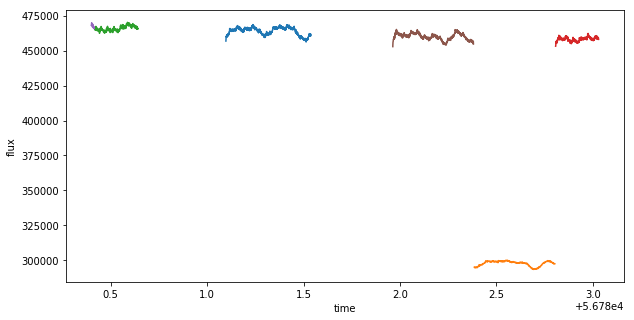

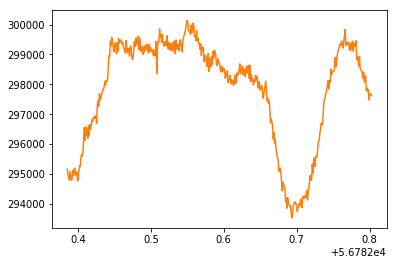

In [80]:
# data = c_f1.data
nbin_num = 40

# bins = len(data) //next this and the next lines of code are found within the def function create above.
# binned_data = [np.mean(data[i*nbin:i*nbin+nbin]) for i in range(1,bins//nbin+1)]

bin_f1 = bin_funct(c_f1,nbin_num)
bin_h1 = bin_funct(c_h1,nbin_num)
bin_f2 = bin_funct(c_f2,nbin_num)
bin_h2 = bin_funct(c_h2,nbin_num)
bin_f3 = bin_funct(c_f3,nbin_num)
bin_h3 =bin_funct(c_h3,nbin_num)
## bin_f4 = bin_funct(c_f4,nbin_num)
## bin_h4 = bin_funct(c_h4,nbin_num)
## bin_f5 = bin_funct(c_f5,nbin_num)
## bin_h5 = bin_funct(c_h5,nbin_num)
bin_f6_1 = bin_funct(c_f6_1,nbin_num)
bin_h6_1 = bin_funct(c_h6_1,nbin_num)
bin_f6_2 = bin_funct(c_f6_2,nbin_num)
bin_h6_2 = bin_funct(c_h6_2,nbin_num)
bin_f7 = bin_funct(c_f7,nbin_num)
bin_h7 = bin_funct(c_h7,nbin_num)

plt.figure(figsize=(10,5))

plt.xlabel('time')
plt.ylabel('flux')
plt.plot(bin_h1,bin_f1,label='Part 1')
plt.plot(bin_h2,bin_f2,label='Part 2')
plt.plot(bin_h3,bin_f3,label='Part 3')
## plt.plot(bin_h4,bin_f4,label='Part 4')
## plt.plot(bin_h5,bin_f5,label='Part 5')
plt.plot(bin_h6_1,bin_f6_1,label='Part 6-1')
plt.plot(bin_h6_2,bin_f6_2,label='Part 6-2')
plt.plot(bin_h7,bin_f7,label='Part 7')

plt.show()
plt.plot(bin_h2,bin_f2,color='tab:orange')
## plt.plot(bin_h4,bin_f4,color='tab:red')
## plt.plot(bin_h5,bin_f5,color='tab:purple')


In [7]:
def IPSV_Model(x,y,c0,c1,c2,c3,c4,c5):
    x_bar=np.mean(x)
    y_bar=np.mean(y)
    result = c0+c1(x-x_bar)+c2(y-y_bar)+c3(x-x_bar)^2+c4(y-y_bar)^2+c5(x-x_bar)(y-y_bar)
    return result
    
def fourier_sinusoidal_series_twoModes(x,a0,b0,a1,b1,a2,b2,freq,offset):
    result = a0*np.cos(2.*0*np.pi*freq*x) \
             + b0*np.sin(2.*0*np.pi*freq*x) \
             + a1*np.cos(2.*1*np.pi*freq*x) \
             + b1*np.sin(2.*1*np.pi*freq*x) \
             + a2*np.cos(2.*2*np.pi*freq*x) \
             + b2*np.sin(2.*2*np.pi*freq*x) \
             + offset
    return result
def complete_model(funct_1,funct_2):
    result= funct_1*funct_2
    return result
